In [2]:
%%time
!pip install -q --upgrade pip fastai

CPU times: user 33.7 ms, sys: 5.79 ms, total: 39.5 ms
Wall time: 2.32 s


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

In [5]:
NUMBER_OF_SAMPLES = 50_000
SIZE = 224 // 8 
MAGNIFICATION = 8
INSETS = 2
THRESHOLD = 0.8

NUMBER_OF_SAMPLES * SIZE * SIZE

39200000

# Creating test data

In [6]:
from PIL import ImageDraw as PILImageDraw
from PIL import Image as PILImage

def create_data():
    return np.random.standard_normal(
        size=(NUMBER_OF_SAMPLES, SIZE, SIZE)) > THRESHOLD

def get_label(data):
    return float(np.sum(data, axis=(0,1)))

def render_image(data):
    img = PILImage.new('RGB', (SIZE*MAGNIFICATION, SIZE*MAGNIFICATION), color = (255,255, 255))
    draw = PILImageDraw.Draw(img)

    for (row_index, row) in enumerate(data):
        for (col_index, value) in enumerate(row):
            x0, y0 = row_index*MAGNIFICATION+INSETS, col_index*MAGNIFICATION+INSETS
            x1, y1 = ((row_index+1)*MAGNIFICATION-INSETS)+1, \
                     ((col_index+1)*MAGNIFICATION-INSETS)+1

            if value: 
                draw.rectangle([(x0, y0), (x1, y1)], fill=(255, 153, 0))  
                
    return Image(pil2tensor(img, np.float32).div(255))

class MyImageItemList(ImageList):
    def __init__(self, path, items, **kwargs):
        super().__init__(items, **kwargs)
        self.path = path
    
    def get(self, i):
        return render_image(self.items[i])

In [14]:
%%time
dt = create_data()
iil = MyImageItemList(Path('.'), items=dt)
ll = iil.random_split_by_pct(0.2)
ll.label_from_func(get_label)
data_bunch = ll.databunch(bs=128)
data_bunch = data_bunch.normalize(imagenet_stats)

CPU times: user 2.75 s, sys: 234 ms, total: 2.99 s
Wall time: 2.5 s


# Create CNN

In [ ]:
learn = create_cnn(data_bunch, models.resnet34, ps=0, true_wd = False, bn_wd = False)
lr = 5e-2
learn.fit_one_cycle(50, slice(lr), wd=0)

epoch,train_loss,valid_loss,time
1,14554.225586,6520.102539,04:56
2,795.085999,23.299984,04:49
3,42.389263,11.343928,04:49
4,7.579411,8.192901,04:49
5,3.707279,3.645651,04:49
6,3.171156,3.315414,04:49
7,3.365916,15.903853,04:49
8,3.731912,1.704693,04:49
9,4.765183,5.523167,04:49
10,5.849888,9.067863,04:49


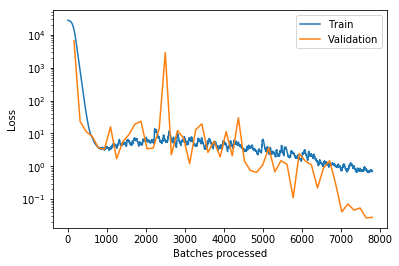

In [ ]:
learn.recorder.plot_losses()
plt.yscale('log')

In [12]:
learn.data.dl_tfms

[]

In [16]:
learn = create_cnn(data_bunch, models.resnet50, ps=0, true_wd = False, bn_wd = False)
lr = 6e-2
learn.fit_one_cycle(100, slice(lr), wd=0)

epoch,train_loss,valid_loss,time
1,620.981628,12.176439,01:41
2,8.682766,5.252069,01:41
3,6.457716,3.055744,01:42
4,5.237785,3.016164,01:54
5,4.277089,4.491363,02:35
6,4.763091,3.578201,02:35
7,3.740592,0.812802,02:35
8,4.298311,4.531415,02:35
9,3.776474,0.700564,02:35
10,3.884002,6.803249,02:34


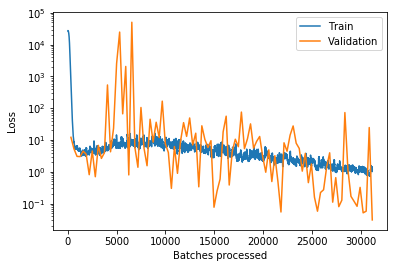

In [19]:
learn.recorder.plot_losses()
plt.yscale('log')

In [20]:
%%time
train = learn.validate(learn.data.train_dl)
val   = learn.validate(learn.data.valid_dl)
(val, train)

CPU times: user 33.7 s, sys: 17.8 s, total: 51.5 s
Wall time: 52.6 s


In [21]:
(train, val)

([0.030495197], [0.030677667])

In [22]:
learn.fit_one_cycle(50, slice(lr), wd=0)

epoch,train_loss,valid_loss,time
1,0.871259,0.836330,01:41
2,1.669200,0.074599,01:41
3,1.424352,0.346821,01:41
4,1.911602,1322.377319,01:41
5,2.156401,20.895298,01:41
6,1.736478,4.398694,01:41
7,2.367392,8.746369,01:41
8,3.636543,2.131520,01:41
9,2.513509,0.817032,01:41
10,4.609601,149.223160,01:41


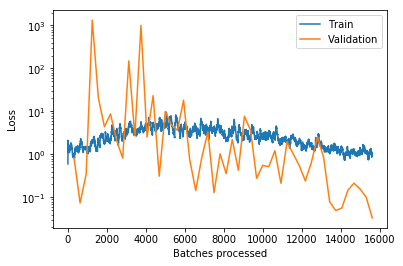

In [23]:
learn.recorder.plot_losses()
plt.yscale('log')

In [24]:
train = learn.validate(learn.data.train_dl)
val   = learn.validate(learn.data.valid_dl)
(val, train)

([0.03332247], [0.032080233])